https://www.kaggle.com/vedavyasv/usa-housing

Os dados contém as seguintes colunas:

* 'Avg. Area Income': Média da renda dos residentes de onde a casa está localizada.
* 'Avg. Area House Age': Média de idade das casas da mesma cidade.
* 'Avg. Area Number of Rooms': Número médio de quartos para casas na mesma cidade.
* 'Avg. Area Number of Bedrooms': Número médio de quartos para casas na mesma cidade
* 'Area Population': A população da cidade onde a casa está localizada.
* 'Price': Preço de venda da casa.
* 'Address': Endereço da casa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv', sep=',')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df)

In [7]:
profile

Não há valores faltantes

In [8]:
df.columns

Index(['Avg._Area_Income', 'Avg._Area_House_Age', 'Avg._Area_Number_of_Rooms',
       'Avg._Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [9]:
X = df[['Avg._Area_Income', 'Avg._Area_House_Age', 'Avg._Area_Number_of_Rooms',
       'Avg._Area_Number_of_Bedrooms', 'Area_Population']]
y = df['Price']

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
results = sm.OLS(y, X).fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.702e+04
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:04:33   Log-Likelihood:                -69078.
No. Observations:                5000   AIC:                         1.382e+05
Df Residuals:                    4995   BIC:                         1.382e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg._Area_Income

Para a coluna o Avg._Area_Number_of_Bedrooms P-valor é maior que 0,05

In [13]:
X = df[['Avg._Area_Income', 'Avg._Area_House_Age', 'Avg._Area_Number_of_Rooms','Area_Population']]

In [14]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 3.377e+04
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:04:33   Log-Likelihood:                -69079.
No. Observations:                5000   AIC:                         1.382e+05
Df Residuals:                    4996   BIC:                         1.382e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg._Area_Income      

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
predictions = model.predict(X_test)

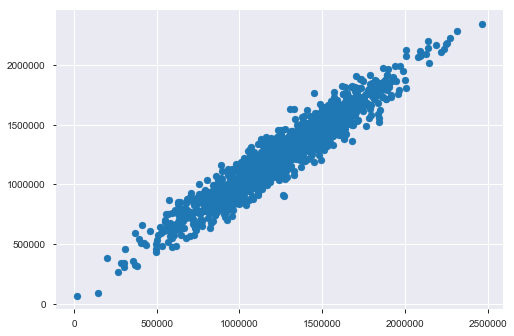

In [20]:
plt.scatter(y_test,predictions)

In [21]:
from sklearn.metrics import r2_score

In [22]:
score = r2_score(y_test, predictions)
print(score)

0.9133894270802786
